## Machine Learning - Ex.2


Submitted by: Dayan Liad 201048204

In [263]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Multivariate Linear Regression

In this exercise we will implement a gradient descent algorithm to solve multivariate linear regression problems.

Then, we will test our algorithm on two different problems:

1. A simple 2-D dataset of housing prices: house price $y$ (in $) as a function of its living area $x_1$ (in square feet) and the number of bedrooms $x_2$.

2. A *non-linear* 1-D problem. 



As a first step, **implement the gradient descent algorithm** (for multivariate linear regression) as discussed in class.

The algorithm should get the $N\times (d+1)$ design matrix $X$ containing all the features ($N$ data samples, each one consists of $d+1$ features) and an $N$-vector of the corresponding $y$ values.

The algorithm starts from an initial guess of $\vec{w}\in\mathcal{R}^{d+1}$ of a vector of zeros, and iterates over the update rule for $T$ steps.

The algorithm returns the final weights vector: $\vec{w}^{(T)}=(w_0,w_1,...,w_d)$, and the values of the cost function along the run: $\vec{J}=(J^{(1)},J^{(2)},...,J^{(T)})$.


### 1. Housing problem (simplified version)

Download and import the dataset files: `ex2x.dat` and `ex2y.dat`.

Explore the dataset: 
- How many samples it has? [**your answer comes here**]
- How many features each of the samples has? 
- Are the features discrete or continous?
- What is the range of each of the features (min to max)?
- What is the range of the target values (the prices)?

In [264]:
X = np.genfromtxt('ex2x.dat')
y = np.genfromtxt('ex2y.dat')

#### Features values Standardization

In [265]:
X[:,0]=(X[:,0]-np.mean(X[:,0]))/np.std(X[:,0])
X[:,1]=(X[:,1]-np.mean(X[:,1]))/np.std(X[:,1])

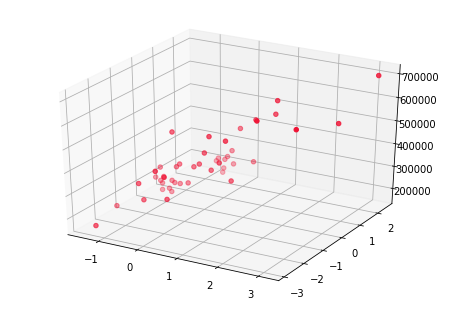

In [83]:
from mpl_toolkits.mplot3d import Axes3D

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], y, color='#ef1234')
plt.show()

In [277]:
def gradient_descent (X, y, alpha, T):

    J=np.zeros(T)
    m=X.shape[0]
    
    x=np.hstack((np.ones(m)[:, np.newaxis], X))
    y=y.reshape(-1,1)

    w=[[0]]*x.shape[1]


    for i in range(T):

        h=x.dot(w)
        w=w-(alpha/m)*x.T.dot(h-y)
        J[i]=(1/(2*m))*(np.sum(np.square(h-y)))
        
        
            
#     for t  in range(T):
#         for i  in range(N):
#             h=x.dot(w)
            
#             J[t] += (np.sum(w*X[i])- y[i])**2
#         w = w - 2*alpha*(h - u)
    

        
    print ('Updated weights:',w)
    #plot the cost
    fig, ax = plt.subplots()  
    ax.plot(np.arange(T), J, 'r')  
    ax.set_xlabel('Iterations')  
    ax.set_ylabel('Cost')  
    ax.set_title('Error')  
    return w,J

Updated weights: [[215810.616791]
 [61446.187814]
 [20070.133138]]


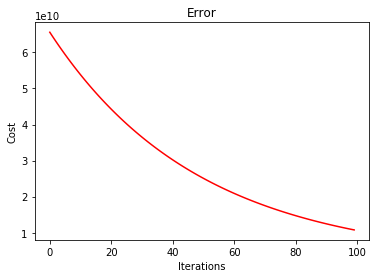

In [285]:
w,J=gradient_descent (X, y, alpha=0.01, T=100)

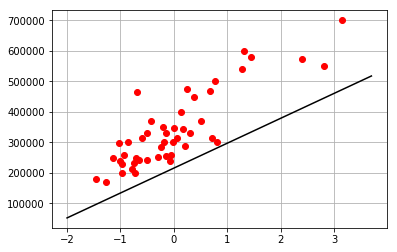

In [280]:
xx = np.linspace(-2,3.7,47)

yy = w[0] + w[1]*xx + w[2]*(xx)

plt.plot(X[:,0],y,'or',xx,yy,'-k')
plt.grid()
plt.show()

Use your gradient descent algorithm to find an optimal solution $\vec{w}$ for the multivariate linear model:

$$ \hat{y} = w_0 + w_1 x_1 + w_2 x_2 $$

where $x_1$ is the house area and $x_2$ is the number of bedrooms. (hint: don't forget to add a column of `ones` to  the design matrix $X$).

- Verify that the algorithm has indeed converged by ploting the graph of $J(t)$). If the graph diverges, try to decrease the learning rate by a factor of 10.
- Print the values of the final $\vec{w}$.
- Use $\vec{w}$ to estimate the price of a house with 1650 square feet and 3 bedroom (hint: should be around 300,000$).



In [284]:
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
print (np.array(w[0] +w[1]*(1650-np.mean(X[:,0]))/np.std(X[:,0])+w[2]*(3-np.mean(X[:,1]))/np.std(X[:,1])))


[101662230.908658]


### 2. Non-linear (polynomial) fit

In this section we will fit to the data a **polynomial model** of degree $d$,

$$ f(x;w) = w_0 + w_1 x + w_2 x^2 + ... + w_d x^d $$

Lets generate some data:

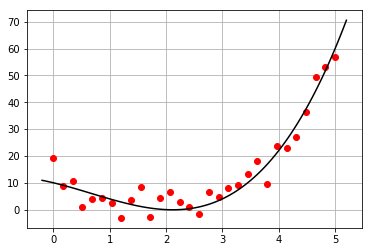

In [261]:
N = 30

# generate N sample points 
x = np.linspace(0,5,N) 
y_ = x**3 -2*x**2 -5*x + 10 # 3rd degree polynom
y_ += np.random.randn(N)*4 # add gaussian noise (with sigma = 4)


xx = np.linspace(-0.2,5.2,100) 
yy = xx**3 -2*xx**2 -5*xx + 10

# plot the data
plt.plot(x,y_,'or',xx,yy,'-k')
plt.grid()
plt.show()


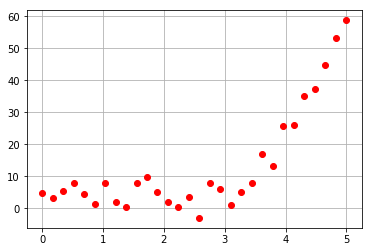

In [262]:
N = 30

# generate N sample points 
x = np.linspace(0,5,N) 
y = x**3 -2*x**2 -5*x + 10 # 3rd degree polynom
y += np.random.randn(N)*4 # add gaussian noise (with sigma = 4)

# plot the data
plt.plot(x,y,'or')
plt.grid()
plt.show()

As a first step, write a function that generates a $N\times(d+1)$ **design-matrix** from the data $\{x_i\}_{i=1}^N$, where the $j$-th coloumn ($j=0,1,...,d)$ contains the values of $(x_i)^j$.

tip: you can use numpy's *broadcasting* technique to perform that without any loops: 

- http://www.labri.fr/perso/nrougier/from-python-to-numpy/index.html#broadcasting

In [193]:
def design_matrix(X, d):
    tempMatrix=np.zeros([len(X),X.shape[1]*d])
    tempMatrix.shape


    for col in range (0,X.shape[1]):

        tempMatrix[:,col*d]=X[:,col]
        tempMatrix[:,col*d+1]=X[:,col]**2
        tempMatrix[:,col*d+2]=X[:,col]**3
    return tempMatrix


In [194]:
x=design_matrix(X, d=3)
x.shape

(47, 6)

Next, use your algorithm to fit a **cubic** model to the data:

$$ f(x;w)=w_0 + w_1 x + w_2 x^2 + w_3 x^3 $$

Verify that the algorithm has indeed converged (plot J, or better log(J), as a function of iteration).



Updated weights: [[161759.895618]
 [17167.668439]
 [64660.421173]
 [-14852.413915]
 [8974.295555]
 [50592.630038]
 [15908.186388]]


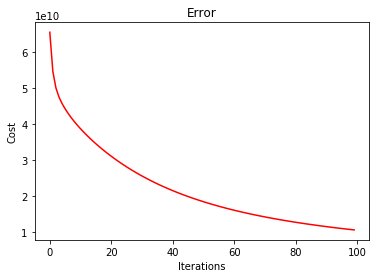

In [195]:
w,J=gradient_descent (x, y, alpha=0.01, T=100)

Finally, plot the sample points $\{(x_i,y_i)\}_{i=1}^N$ together with the fitted polynom $f(x;w)$:


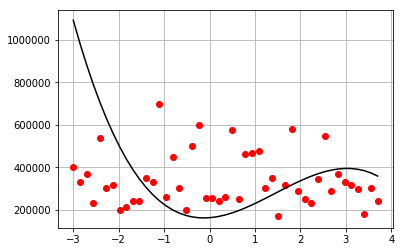

In [230]:
xx = np.linspace(-3,3.7,47)

yy = w[0] + w[1]*xx + w[2]*(xx**2) + w[3]*(xx**3) 

plt.plot(xx,y,'or',xx,yy,'-k')
plt.grid()
plt.show()

## Good luck !